### Question 4: Do comorbidities affect patient outcomes/stage and grade of tumors?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from cci import charlson_comorbidity_idx
import json
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

# Load the data
data = pd.read_json('cci_kits23.json')
data['pathology_t_stage'] = data['pathology_t_stage'].apply(lambda x: '1' if x in ['1a', '1b'] else ('2' if x in ['2a', '2b'] else x))
data['vital_status'] = data['vital_status'].apply(lambda x: 1 if x == 'dead' else 0)


Charleson Comorbidity index creates a score based on the patient's comorbidities, higher score means more comorbidities. it is well established that a higher CCI score means worse long term survival outcomes

In [13]:
# Chi Square Test of Independence

contingency_table = pd.crosstab(data['pathology_t_stage'], data['cci_points']) 
# contingency_table = pd.crosstab(data['age_at_nephrectomy'], data['pathology_t_stage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Tumor Stage")
print('Chi2:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
# print('Expected:', expected)

contingency_table = pd.crosstab(data['tumor_isup_grade'], data['cci_points']) 
# contingency_table = pd.crosstab(data['age_at_nephrectomy'], data['pathology_t_stage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Tumor Grade")
print('Chi2:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
# print('Expected:', expected)

Tumor Stage
Chi2: 83.35660189773897
p-value: 0.010307847180778946
Degrees of freedom: 56
Tumor Grade
Chi2: 76.75472337620275
p-value: 0.03422922471649169
Degrees of freedom: 56


Conclusion: There is a significant association between amount of comorbidities and tumor grade and stage at an alpha of 0.05

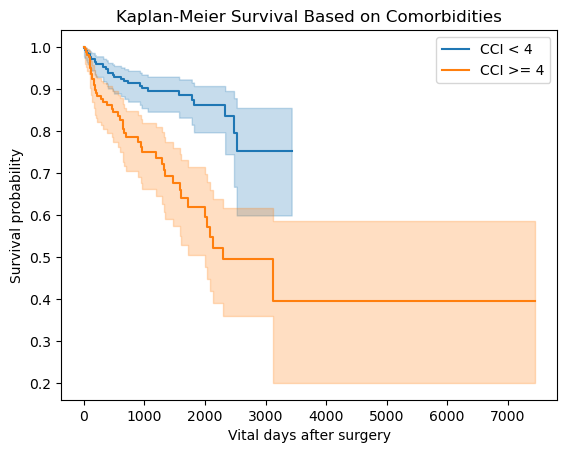

In [14]:
data['cci_geq_4'] = data['cci_points'].apply(lambda x: 1 if x >= 4 else 0)

kmf = KaplanMeierFitter()

group_1 = data[data['cci_geq_4'] == 0]
group_2 = data[data['cci_geq_4'] == 1]

kmf.fit(group_1['vital_days_after_surgery'], event_observed=group_1['vital_status'], label='CCI < 4')

kmf.plot()

kmf.fit(group_2['vital_days_after_surgery'], event_observed=group_2['vital_status'], label='CCI >= 4')

kmf.plot()

plt.title('Kaplan-Meier Survival Based on Comorbidities')
plt.xlabel('Vital days after surgery')
plt.ylabel('Survival probability')

plt.show()

Conclusion: There is a significant association between more comorbidities and long term chances of survival (no overlap between confidence intervals). CCI of 4 chosen as the cutoff because literature says that CCI > 4 is a 50% chance that the patient dies in next 10 years